### 비지도 학습 : 머신러닝의 미래
- 입력데이터(X)만 존재, 출력(Y) 없음

In [1]:
# p221 10개의 숫자 이미지 OCR(Optical Character Recognization 광학글자인식)
# 비지도학습으로 숫자 인식
from sklearn.datasets import load_digits
digits = load_digits()

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
digits.target.shape # Y 예측 목표

(1797,)

In [4]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
import matplotlib.pyplot as plt

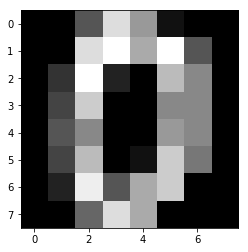

In [14]:
plt.imshow(digits.images[0], cmap='gray')

In [15]:
# p221 64개의 명암값을 2개로 차원축소를 해서 2차원 그래프에 산점도로 그려보자.
from sklearn.decomposition import PCA

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
pca = PCA(n_components=2).fit(digits.data) # 64차원을 2차원으로 축소하기 위한 fitting
pca_x = pca.transform(digits.data)

In [18]:
pca_x.shape

(1797, 2)

In [19]:
import mglearn

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


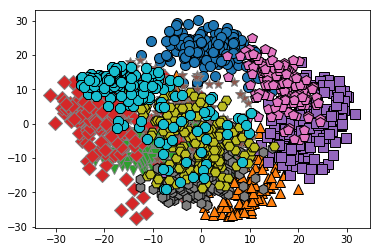

In [20]:
l = mglearn.discrete_scatter(pca_x[:, 0], pca_x[:, 1], digits.target)

In [21]:
# p223 TSNE는 픽셀과 픽셀의 관계 방향을 인식한다.
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE().fit_transform(digits.data)

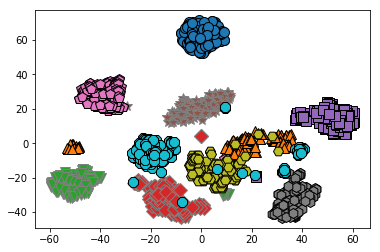

In [24]:
l = mglearn.discrete_scatter(tsne[:, 0], tsne[:, 1], digits.target)

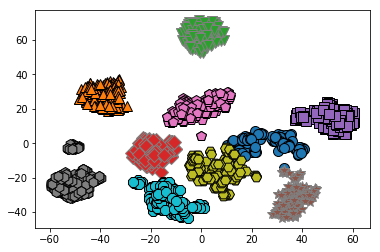

In [52]:
# K-평균 군집
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10).fit(tsne)
mglearn.discrete_scatter(tsne[:, 0], tsne[:, 1], km.predict(tsne))
plt.show()

### 군집 (Clustering)
- 분류, 이상치 검출(Abnormal Detection)
1. K-평균 군집
1. 병합 군집
1. DBSCAN (Density Based Spatial Clustering Application Noise: 밀도가 높은 공간)

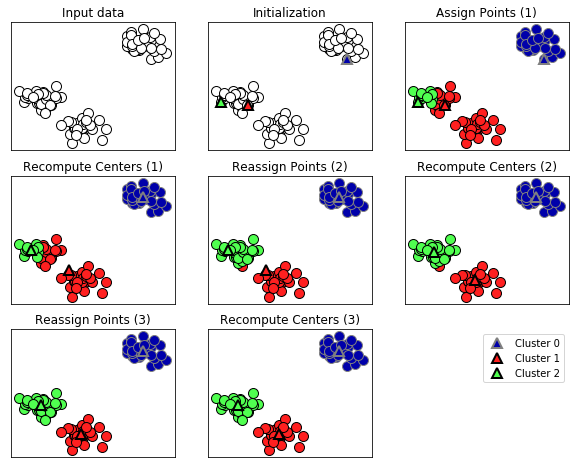

In [25]:
# p225
mglearn.plots.plot_kmeans_algorithm()

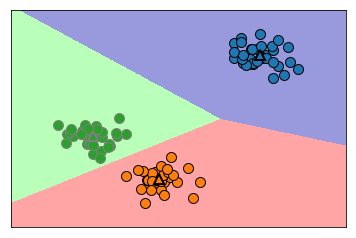

In [26]:
mglearn.plots.plot_kmeans_boundaries()

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [38]:
X, y = make_blobs()
X.shape, y.shape

((100, 2), (100,))

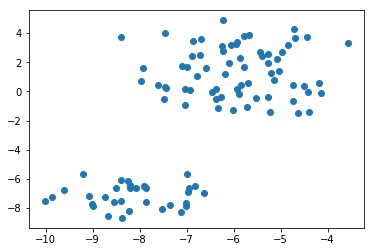

In [39]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

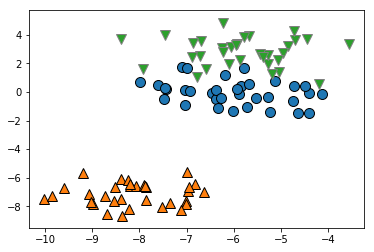

In [40]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.predict(X)

array([2, 1, 3, 3, 1, 3, 3, 1, 0, 2, 1, 2, 1, 3, 3, 0, 1, 0, 0, 3, 3, 2,
       2, 1, 3, 0, 1, 0, 1, 1, 3, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 3, 3,
       1, 1, 2, 2, 1, 3, 3, 0, 1, 2, 0, 0, 2, 2, 3, 1, 3, 1, 1, 0, 1, 3,
       3, 3, 3, 1, 0, 0, 3, 1, 0, 1, 1, 1, 2, 1, 3, 3, 1, 3, 0, 0, 3, 1,
       3, 0, 3, 1, 0, 1, 0, 3, 1, 0, 2, 2])

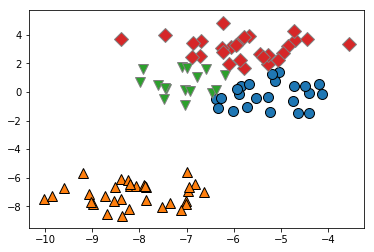

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.predict(X))
plt.show()

### 와인 데이터를 분류해 보자.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('wine.data', header=None)
df.shape

(178, 14)

In [88]:
df.columns = ['region', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
              'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head()

,region,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
df['region'].value_counts()

2    71
1    59
3    48
Name: region, dtype: int64

In [90]:
wine = df.drop(columns='region')
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


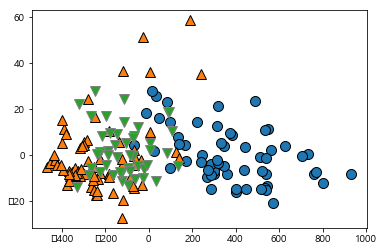

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(wine)
X = pca.transform(wine)

mglearn.discrete_scatter(X[:, 0], X[:, 1], df['region'])
plt.show()

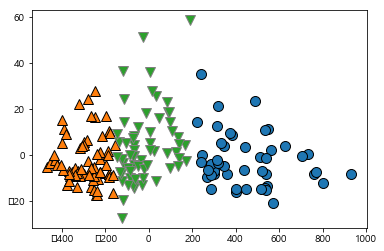

In [103]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
km_res = km.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], km_res)
plt.show()

### 한국프로야구팀을 분류해 보자.

In [76]:
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
print('테이블의 개수 = ', len(tables))

테이블의 개수 =  7


In [104]:
baseball = tables[0].copy() # copy() 를 안 쓰면 주소를 넘겨서 아래의 명령 수행시 tables[0] 값도 바뀐다. copy()면 복사본으로 만든다.
baseball.set_index('팀명', inplace=True) # return 없이 자기 자신을 바꾼다. 원본을 바꾸기 때문에 재실행을 위해 가급적 안한다.
baseball

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패
KT,6,42,1,47,0.472,17.5,407,456,1패
삼성,7,37,1,49,0.430,21.0,400,424,2승
KIA,8,36,1,52,0.409,23.0,401,467,2패
한화,9,34,0,53,0.391,24.5,388,449,1승


In [78]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, SK to 롯데
Data columns (total 9 columns):
순위     10 non-null int64
승      10 non-null int64
무      10 non-null int64
패      10 non-null int64
승률     10 non-null float64
게임차    10 non-null float64
득점     10 non-null int64
실점     10 non-null int64
연속     10 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 800.0+ bytes


In [73]:
data = baseball.drop(columns='연속')
data.shape

(10, 8)

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [80]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(data_pca)
km.predict(data_pca)

array([0, 0, 0, 2, 2, 1, 2, 1, 1, 1])

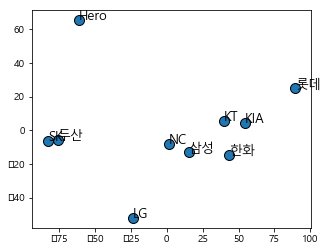

In [100]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5, 4))
plt.xlim(data_pca[:, 0].min(), data_pca[:, 0].max() + 1)
plt.ylim(data_pca[:, 1].min(), data_pca[:, 1].max() + 1)
for i in range(len(data_pca)):
    plt.text(data_pca[i, 0], data_pca[i, 1], data.index[i], fontdict={'size':13})

mglearn.discrete_scatter(data_pca[:, 0], data_pca[:, 1], km.predict(data_pca))
plt.show()

### 대출 상환 가능 여부 분류

In [107]:
loans = pd.read_csv('loans.csv').dropna()
loans_hot = pd.get_dummies(loans)

In [109]:
pca = PCA(n_components=2).fit(loans_hot)
X = pca.transform(loans_hot)
km = KMeans(n_clusters=2).fit(X)
group = km.predict(X)

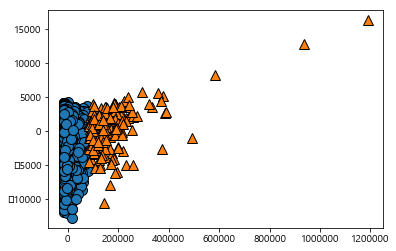

In [110]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], group)
plt.show()

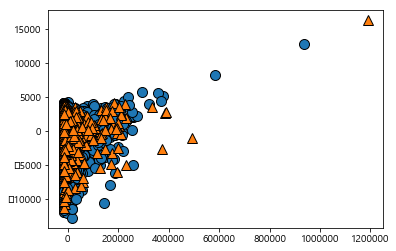

In [111]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], loans.iloc[:, -1])
plt.show()